In [1]:
import pandas as pd
from skimpy import clean_columns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", None)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Foreign exchange rates dataset
fe = pd.read_csv('Foreign_Exchange_Rates.csv', index_col=0)
fe.drop('HONG KONG - HONG KONG DOLLAR/US$', axis=1, inplace=True)
fe.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'INDIA - INDIAN RUPEE/US$', 'KOREA - WON/US$',
       'MEXICO - MEXICAN PESO/US$', 'SOUTH AFRICA - RAND/US$',
       'SINGAPORE - SINGAPORE DOLLAR/US$', 'DENMARK - DANISH KRONE/US$',
       'JAPAN - YEN/US$', 'MALAYSIA - RINGGIT/US$',
       'NORWAY - NORWEGIAN KRONE/US$', 'SWEDEN - KRONA/US$',
       'SRI LANKA - SRI LANKAN RUPEE/US$', 'SWITZERLAND - FRANC/US$',
       'TAIWAN - NEW TAIWAN DOLLAR/US$', 'THAILAND - BAHT/US$'],
      dtype='object')

In [3]:
fe.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
len(fe)

5217

In [5]:
# Convert date to date object and extract year
fe['Time Serie'] = pd.to_datetime(fe['Time Serie'])
fe['Time Serie'] = fe['Time Serie'].dt.year

In [6]:
# Consolidate foreign exchange rates to yearly average
fe_columns = ['Austrailia', 'Euro Area', 'New Zealand', 'United Kingdom', 'Brazil', 'Canada', 'China', 'India', 'South Korea', 
              'Mexico', 'South Africa', 'Singapore', 'Denmark', 'Japan', 'Malaysia', 'Norway', 'Sweden', 'Sri Lanka', 'Switzerland', 'Taiwan', 'Thailand']
fe.replace(to_replace='ND', value=np.nan, inplace=True)
fe = fe.apply(pd.to_numeric)
df = pd.DataFrame()
df['Year'] = fe['Time Serie'].unique()
for i in range(1, len(fe.columns)):
    series = fe.groupby(['Time Serie'])[fe.columns[i]].mean()
    df.insert(i, fe_columns[i-1], series.values)
df

,Year,Austrailia,Euro Area,New Zealand,United Kingdom,Brazil,Canada,China,India,South Korea,Mexico,South Africa,Singapore,Denmark,Japan,Malaysia,Norway,Sweden,Sri Lanka,Switzerland,Taiwan,Thailand
0,2000,1.727126,1.086398,2.204233,0.661126,1.830128,1.485542,8.278412,44.997476,1130.897540,9.458607,6.946803,1.724978,8.095254,107.804048,3.800002,8.813068,9.173481,76.964365,1.690408,31.259937,40.209833
1,2001,1.936453,1.117998,2.381929,0.694800,2.352697,1.548735,8.277013,47.219960,1292.014920,9.336640,8.609349,1.792972,8.332317,121.568040,3.800005,8.996417,10.342548,89.601720,1.689094,33.824296,44.531888
2,2002,1.841163,1.061171,2.161254,0.666690,2.921338,1.570400,8.277051,48.625697,1250.313984,9.663268,10.517567,1.790782,7.886208,125.220438,3.800016,7.983912,9.723307,95.772749,1.556704,34.536295,43.019204
3,2003,1.540872,0.885085,1.722408,0.612383,3.075000,1.400818,8.277171,46.590797,1192.081673,10.792529,7.555010,1.742909,6.577386,115.938685,3.800000,7.080261,8.078662,96.541315,1.344976,34.404717,41.555896
4,2004,1.360242,0.804921,1.508478,0.545839,2.926242,1.301674,8.276793,45.260988,1145.236364,11.289708,6.440219,1.690208,5.989083,108.150830,3.800000,6.739950,7.348018,101.267648,1.242805,33.371913,40.271083
5,2005,1.311738,0.804609,1.419382,0.549990,2.435249,1.211503,8.193588,44.000199,1023.749163,10.893850,6.360623,1.663917,5.995334,110.106932,3.786920,6.441212,7.470993,100.382570,1.245945,32.131195,40.251606
6,2006,1.327884,0.796718,1.543045,0.543251,2.173765,1.134032,7.972344,45.186056,954.320996,10.905557,6.766845,1.588243,5.942168,116.312072,3.666098,6.409490,7.371762,103.940279,1.253165,32.506494,37.876255
7,2007,1.194504,0.730424,1.360346,0.499690,1.946141,1.073429,7.605780,41.177402,928.971654,10.928094,7.047692,1.506506,5.441278,117.762323,3.435413,5.855737,6.754998,110.619606,1.199887,32.854661,32.203031
8,2008,1.194603,0.682577,1.422221,0.544967,1.832632,1.065954,6.947740,43.385913,1098.706111,11.142532,8.247969,1.413977,5.088500,103.390635,3.329192,5.636512,6.584565,108.297718,1.081557,31.520536,32.962381
9,2009,1.280020,0.719551,1.597137,0.640913,1.997594,1.141152,6.830739,48.332381,1274.625159,13.497871,8.411654,1.454262,5.357380,93.682659,3.523123,6.290783,7.653918,114.908790,1.085971,33.020032,34.310437


In [7]:
# Deaths by risk factor dataset
drf = pd.read_csv('Number of Deaths by Risk Factors.csv')
drf.head()

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,Child wasting,Unsafe sex,Diet low in nuts and seeds,Household air pollution from solid fuels,Diet low in vegetables,Low physical activity,Smoking,High fasting plasma glucose,Air pollution,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use - Sex: Both - Age: All Ages (Number),Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,4794,16135,19546,351,2319,34372,3679,2637,5174,11449,37231,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,4921,17924,20334,361,2449,35392,3732,2652,5247,11811,38315,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,5279,21200,22895,378,2603,38065,3827,2688,5363,12265,41172,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,5734,23795,27002,395,2771,41154,3951,2744,5522,12821,44488,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,6050,24866,29205,410,2932,43153,4075,2805,5689,13400,46634,9675,5418,7421,247,413,2665,11031,204,3833,812


In [8]:
unique_countries = drf['Entity'].unique()
unique_countries

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

In [9]:
# Drop countries and years that do not overlap with foreign exchange rate data
drop_countries = ['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria','American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Azerbaijan','Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus','Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia','Bosnia and Herzegovina', 'Botswana', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad','Chile', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba','Czechia', 'Democratic Republic of Congo', 'Djibouti','Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)','Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Europe & Central Asia (WB)','European Region (WHO)', 'Fiji', 'G20','Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea','Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary','Iceland', 'Indonesia', 'Iran', 'Iraq',
       'Israel','Jamaica', 'Jordan', 'Kazakhstan','Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos','Latin America & Caribbean (WB)', 'Lebanon', 'Lesotho','Liberia', 'Libya', 'Madagascar','Malawi', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Micronesia (country)', 'Middle East & North Africa (WB)',
       'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco','Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal','Nicaragua', 'Niger', 'Nigeria','Niue', 'North America (WB)', 'North Korea', 'North Macedonia','Northern Ireland', 'Northern Mariana Islands', 'OECD Countries', 'Oman', 'Pakistan', 'Palau', 'Palestine',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines','Poland', 'Puerto Rico', 'Qatar','Region of the Americas (WHO)', 'Romania', 'Russia', 'Rwanda','Saint Kitts and Nevis', 'Saint Lucia','Saint Vincent and the Grenadines', 'Samoa', 'San Marino','Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa','South Asia (WB)', 'South Sudan','South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Sudan', 'Suriname', 'Syria', 'Tajikistan', 'Tanzania', 'Timor', 'Togo', 'Tokelau', 'Tonga','Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan','Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United States Virgin Islands',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam','Western Pacific Region (WHO)', 'World','World Bank High Income', 'World Bank Low Income','World Bank Lower Middle Income', 'World Bank Upper Middle Income','Yemen', 'Zambia', 'Zimbabwe']
drf = drf[~drf['Entity'].isin(drop_countries)]
drf = drf[~drf['Year'].isin(list(range(1990, 2000)))]
drf.tail()

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,Child wasting,Unsafe sex,Diet low in nuts and seeds,Household air pollution from solid fuels,Diet low in vegetables,Low physical activity,Smoking,High fasting plasma glucose,Air pollution,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use - Sex: Both - Age: All Ages (Number),Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
6565,Wales,NaN,2015,802,5019,388,1114,1234,623,3,470,59,9,101,442,1,322,1242,6840,2750,800,2705,1,26,324,269,0,0,0,1,0
6566,Wales,NaN,2016,739,4948,384,1100,1251,617,2,469,56,9,100,434,1,317,1220,6701,2770,738,2708,1,26,338,271,0,0,0,1,0
6567,Wales,NaN,2017,700,4947,387,1105,1268,616,2,470,55,9,99,434,1,316,1221,6630,2832,700,2740,1,27,346,271,0,0,0,1,0
6568,Wales,NaN,2018,734,5133,402,1148,1274,634,2,482,53,9,100,448,1,326,1272,6721,2995,733,2824,1,27,347,274,0,0,0,1,0
6569,Wales,NaN,2019,765,5310,415,1183,1291,649,2,492,52,9,100,459,1,334,1317,6813,3158,764,2902,1,27,349,280,0,0,0,1,0


In [10]:
drf['Entity'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China',
       'Cyprus', 'Denmark', 'England', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'India', 'Ireland', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Scotland',
       'Singapore', 'Slovakia', 'Slovenia', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'United Kingdom', 'United States', 'Wales'], dtype=object)

In [11]:
# Consolidate multi-country regions
uk_countries = ['England', 'Scotland', 'Wales']
# Break out countries list into a new dataframe, drop countries containing name from dataframe
uk_df = pd.DataFrame()
uk_df = drf[drf['Entity'].str.contains('England|Scotland|Wales')]
drf = drf[~drf['Entity'].isin(uk_countries)]
series2 = uk_df.groupby(['Year'], as_index =False)[uk_df.columns[3:]].sum()
uk_df = uk_df[0:0]
uk_df['Year'] = fe['Time Serie'].unique()
uk_df['Entity'] = 'United Kingdom'
uk_df['Code'] = 'UK'
for i in range(1, len(series2.columns)):
    uk_df[series2.columns[i]] = series2[series2.columns[i]].values
uk_df.head()

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,Child wasting,Unsafe sex,Diet low in nuts and seeds,Household air pollution from solid fuels,Diet low in vegetables,Low physical activity,Smoking,High fasting plasma glucose,Air pollution,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use - Sex: Both - Age: All Ages (Number),Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,United Kingdom,UK,2000,29332,136477,7903,27455,18402,12709,29,11729,1800,164,2054,15598,35,8139,17131,148002,67031,29312,56083,8,500,3216,3243,0,3,1,21,6
1,United Kingdom,UK,2001,27579,130059,7639,26413,19153,12282,34,10981,1723,163,2056,14790,33,7803,16760,142925,66576,27561,54960,9,449,3326,3370,0,3,1,18,6
2,United Kingdom,UK,2002,26790,125320,7490,25869,20183,12048,42,10587,1713,162,2047,14266,30,7606,16658,141082,67589,26748,54814,11,436,3400,3516,0,3,1,17,4
3,United Kingdom,UK,2003,25661,118945,7251,25097,21112,11703,49,10166,1789,165,2071,13593,28,7331,16366,138818,67918,25615,54198,12,428,3451,3657,0,3,1,17,5
4,United Kingdom,UK,2004,23926,109738,6839,23682,21574,11094,58,9522,1761,163,1981,12613,26,6887,15560,133584,66207,23878,52379,14,409,3512,3692,0,2,1,16,5


In [12]:
euro_countries = ['Austria','Belgium','Cyprus','Estonia','Finland','France','Germany','Greece','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Portugal','Slovakia','Slovenia','Spain']
euro_df = pd.DataFrame()
euro_df = drf[drf['Entity'].str.contains('Austria|Belgium|Cyprus|Estonia|Finland|France|Germany|Greece|Ireland|Italy|Latvia|Lithuania|Luxembourg|Malta|Netherlands|Portugal|Slovakia|Slovenia|Spain')]
drf = drf[~drf['Entity'].isin(euro_countries)]
series3 = euro_df.groupby(['Year'], as_index = False)[euro_df.columns[3:]].sum()
series3.reset_index()
euro_df = euro_df[0:0]
euro_df['Year'] = fe['Time Serie'].unique()
euro_df['Entity'] = 'Euro Area'
euro_df['Code'] = 'EURO'
for i in range(1, len(series3.columns)):
    euro_df[series3.columns[i]] = series3[series3.columns[i]].values
euro_df.head()

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,Child wasting,Unsafe sex,Diet low in nuts and seeds,Household air pollution from solid fuels,Diet low in vegetables,Low physical activity,Smoking,High fasting plasma glucose,Air pollution,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use - Sex: Both - Age: All Ages (Number),Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Euro Area,EURO,2000,159077,697849,56039,137531,223436,41134,209,45710,6097,4244,15155,26776,2644,30204,73759,556142,378184,160767,295509,139,1001,21095,26857,0,16,9,77,22
1,Euro Area,EURO,2001,154765,686662,55213,136373,222005,40591,208,44871,5886,4331,15042,26124,2492,29730,73574,549376,379678,156397,296529,141,988,21054,27108,0,15,8,74,22
2,Euro Area,EURO,2002,153644,681129,54677,136194,221923,40271,224,44370,5692,4482,15070,25554,2314,29543,74186,546427,386846,154899,299526,136,1003,20968,27507,0,15,8,70,20
3,Euro Area,EURO,2003,151174,674661,54226,135822,221840,39824,247,43970,5548,4650,15397,25005,2165,29304,74445,543417,393974,152243,302719,150,1015,21017,27808,0,14,7,69,20
4,Euro Area,EURO,2004,144306,647915,52286,131069,216613,38325,254,42310,5393,4519,15014,23746,1976,28147,72003,529051,387553,145174,298066,153,990,20717,27232,0,14,6,67,19


In [13]:
drf = pd.concat([drf, uk_df, euro_df])
drf.reset_index(drop=True, inplace=True)
drf

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,Secondhand smoke,Low birth weight,Child wasting,Unsafe sex,Diet low in nuts and seeds,Household air pollution from solid fuels,Diet low in vegetables,Low physical activity,Smoking,High fasting plasma glucose,Air pollution,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use - Sex: Both - Age: All Ages (Number),Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Australia,AUS,2000,2094,26103,1090,5190,6162,2467,14,1679,506,116,457,1054,56,1684,3974,20466,15233,2149,13557,5,65,1726,925,0,2,0,5,2
1,Australia,AUS,2001,2058,25603,1081,5133,6220,2441,15,1655,495,120,444,1034,50,1658,3984,20046,15630,2105,13685,5,67,1626,978,0,2,0,5,2
2,Australia,AUS,2002,2007,25299,1080,5116,6361,2436,16,1649,486,125,436,1021,45,1647,4036,19775,16238,2049,13949,5,70,1625,1048,0,2,0,5,2
3,Australia,AUS,2003,1918,24588,1067,5019,6459,2395,18,1622,477,127,441,991,39,1612,4004,19199,16548,1955,14038,6,72,1667,1103,0,2,0,6,1
4,Australia,AUS,2004,1808,23550,1033,4878,6512,2340,20,1581,483,131,455,944,34,1549,3948,18866,16583,1840,14000,6,71,1699,1152,0,2,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Euro Area,EURO,2015,117696,648017,53452,124227,207490,36763,390,37695,4061,6146,12669,21676,926,26235,67311,513322,402435,117628,326673,211,1192,22755,35661,0,7,4,43,14
436,Euro Area,EURO,2016,110918,651033,53491,124033,206393,36685,393,37224,4042,6290,12630,21616,864,26177,71196,509623,405657,110870,328283,214,1207,22679,36285,0,7,4,42,14
437,Euro Area,EURO,2017,107573,658843,54241,126329,207430,37088,381,37458,3728,6439,12557,21938,821,26490,77998,512282,414702,107562,332224,204,1224,23108,36423,0,6,4,39,11
438,Euro Area,EURO,2018,110250,673755,55298,129519,209771,37654,376,38087,3535,6632,12553,22352,795,26930,80768,515575,427859,110115,338957,195,1249,23569,37178,0,5,3,35,11


### **** Adding in new code starting here ****

In [16]:
# clean column names to remove excess white spaces, adds in underscore
# (will need to install skimpy if can't run this - pip install skimpy)
clean_drf = clean_columns(drf)
clean_drf.columns.tolist()

31 column names have been cleaned

['entity',
 'code',
 'year',
 'outdoor_air_pollution',
 'high_systolic_blood_pressure',
 'diet_high_in_sodium',
 'diet_low_in_whole_grains',
 'alcohol_use',
 'diet_low_in_fruits',
 'unsafe_water_source',
 'secondhand_smoke',
 'low_birth_weight',
 'child_wasting',
 'unsafe_sex',
 'diet_low_in_nuts_and_seeds',
 'household_air_pollution_from_solid_fuels',
 'diet_low_in_vegetables',
 'low_physical_activity',
 'smoking',
 'high_fasting_plasma_glucose',
 'air_pollution',
 'high_body_mass_index',
 'unsafe_sanitation',
 'no_access_to_handwashing_facility',
 'drug_use_sex_both_age_all_ages_number',
 'low_bone_mineral_density',
 'vitamin_a_deficiency',
 'child_stunting',
 'discontinued_breastfeeding',
 'non_exclusive_breastfeeding',
 'iron_deficiency']

In [32]:
# convert data values of type string to float so linear regression will run
clean_drf = clean_drf.apply(pd.to_numeric, errors='coerce')

In [17]:
# make a list of the yearly fe rates for Austraila from the foreign exchange df (already in order by year)
aus_fe = []
aus_fe = df['Austrailia'].tolist()
aus_fe

[1.7271261904761903,
 1.9364531999999999,
 1.8411625498007969,
 1.5408717131474103,
 1.3602422924901185,
 1.3117378486055777,
 1.3278844621513943,
 1.1945035433070867,
 1.1946027777777777,
 1.2800198412698414,
 1.0898644,
 0.9687896414342629,
 0.9658569721115539,
 1.0361693227091635,
 1.108624,
 1.3320207171314742,
 1.3443804780876494,
 1.304395983935743,
 1.3384678714859437,
 1.4389710843373495]

In [33]:
# make a df to hold only data for Austrailia
aus = pd.DataFrame()
aus['avg_fe_rate'] = ""

# add in Austrailia's avg fe rate for each year
fe_ind = 0;
for i in range(0,20):
    aus = pd.concat([aus, clean_drf.iloc[[i]]])
    aus.loc[fe_ind, ['avg_fe_rate']] = aus_fe[fe_ind]
    fe_ind +=1

# drop these columns so that linear regression can run correctly
aus = aus.drop('entity', axis=1)
aus = aus.drop('code', axis=1)
aus = aus.drop('year', axis=1)

aus.head(5)

,avg_fe_rate,outdoor_air_pollution,high_systolic_blood_pressure,diet_high_in_sodium,diet_low_in_whole_grains,alcohol_use,diet_low_in_fruits,unsafe_water_source,secondhand_smoke,low_birth_weight,child_wasting,unsafe_sex,diet_low_in_nuts_and_seeds,household_air_pollution_from_solid_fuels,diet_low_in_vegetables,low_physical_activity,smoking,high_fasting_plasma_glucose,air_pollution,high_body_mass_index,unsafe_sanitation,no_access_to_handwashing_facility,drug_use_sex_both_age_all_ages_number,low_bone_mineral_density,vitamin_a_deficiency,child_stunting,discontinued_breastfeeding,non_exclusive_breastfeeding,iron_deficiency
0,1.727126,2094.0,26103.0,1090.0,5190.0,6162.0,2467.0,14.0,1679.0,506.0,116.0,457.0,1054.0,56.0,1684.0,3974.0,20466.0,15233.0,2149.0,13557.0,5.0,65.0,1726.0,925.0,0.0,2.0,0.0,5.0,2.0
1,1.936453,2058.0,25603.0,1081.0,5133.0,6220.0,2441.0,15.0,1655.0,495.0,120.0,444.0,1034.0,50.0,1658.0,3984.0,20046.0,15630.0,2105.0,13685.0,5.0,67.0,1626.0,978.0,0.0,2.0,0.0,5.0,2.0
2,1.841163,2007.0,25299.0,1080.0,5116.0,6361.0,2436.0,16.0,1649.0,486.0,125.0,436.0,1021.0,45.0,1647.0,4036.0,19775.0,16238.0,2049.0,13949.0,5.0,70.0,1625.0,1048.0,0.0,2.0,0.0,5.0,2.0
3,1.540872,1918.0,24588.0,1067.0,5019.0,6459.0,2395.0,18.0,1622.0,477.0,127.0,441.0,991.0,39.0,1612.0,4004.0,19199.0,16548.0,1955.0,14038.0,6.0,72.0,1667.0,1103.0,0.0,2.0,0.0,6.0,1.0
4,1.360242,1808.0,23550.0,1033.0,4878.0,6512.0,2340.0,20.0,1581.0,483.0,131.0,455.0,944.0,34.0,1549.0,3948.0,18866.0,16583.0,1840.0,14000.0,6.0,71.0,1699.0,1152.0,0.0,2.0,0.0,6.0,2.0


In [20]:
# get data and target 
output_data = aus['avg_fe_rate']
input_data = aus.drop('avg_fe_rate', axis=1)

In [21]:
# split data into test and train sets
input_train, input_test, output_train, output_test =  train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [22]:
# run linear reg for all features 
reg = LinearRegression()
reg.fit(input_train, output_train)
pred = reg.predict(input_test)

In [34]:
# print stats from all features linear reg
mse = mean_squared_error(output_test, pred)
r2 = reg.score(input_train, output_train)
coef = reg.coef_


print("mse: " + str(mse) + '\n')
print("r2: " + str(r2) + '\n')
print("coef: " + str(coef) + '\n')

mse: 0.1695587202400301

r2: 1.0

coef: [-0.01275147  0.00091816 -0.01261226  0.00724629  0.00058332  0.04050813
 -0.00096225 -0.00129688  0.00065938 -0.02318889  0.00071352  0.02210081
 -0.00424038 -0.02376109 -0.01083583 -0.0016378  -0.00195078 -0.00454265
  0.00052606 -0.00735007 -0.0076465  -0.00546495  0.00546155  0.
  0.00268789  0.         -0.0044487   0.02113546]



AUSTRAILIA DATA


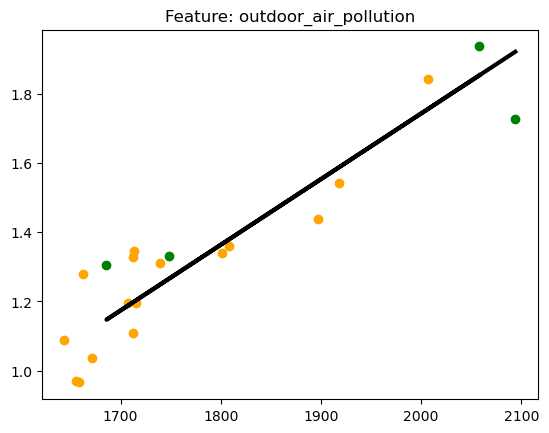

mse: 0.018461308200013845
r2: 0.8114695162915299
coef: [[0.0018969]]




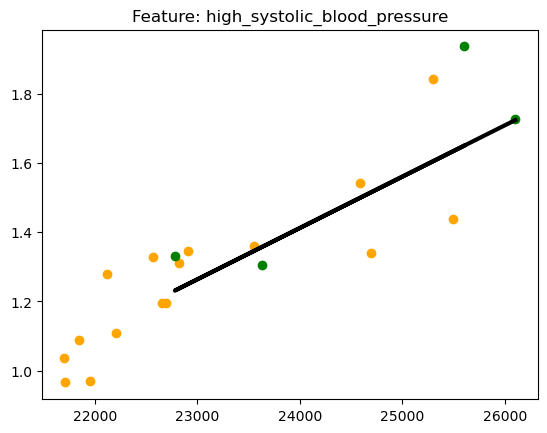

mse: 0.02381467090660027
r2: 0.7183930929643694
coef: [[0.00014827]]




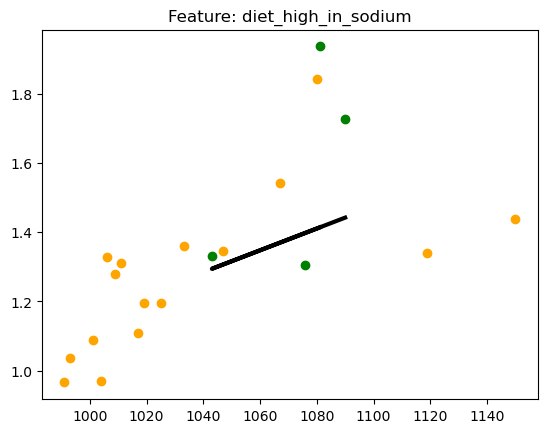

mse: 0.09118206918849278
r2: 0.41764725685182214
coef: [[0.00314544]]




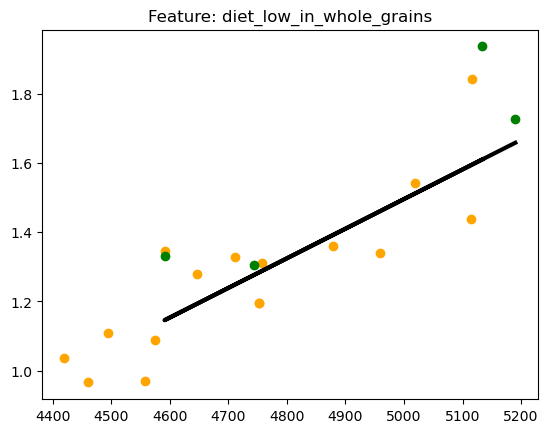

mse: 0.03677053948215199
r2: 0.7332525028046819
coef: [[0.00085588]]




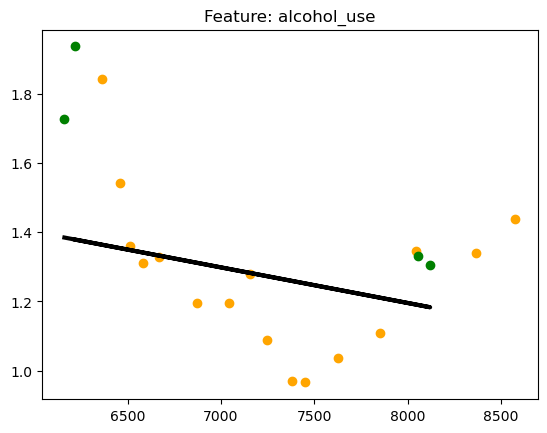

mse: 0.11590656835804955
r2: 0.09921293223868266
coef: [[-0.00010285]]




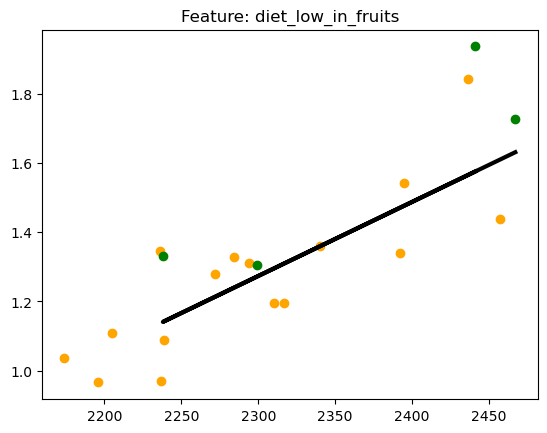

mse: 0.04432180998087601
r2: 0.6708375103625241
coef: [[0.0021406]]




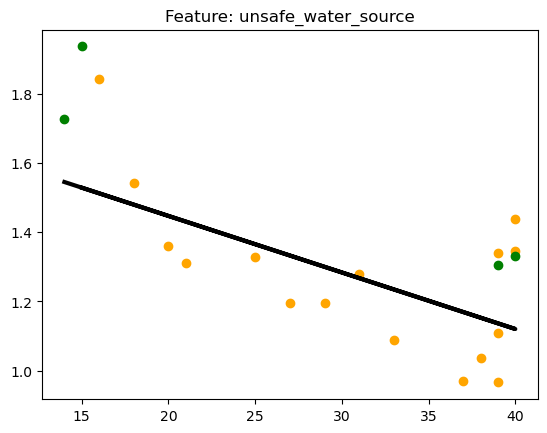

mse: 0.06811846930035653
r2: 0.3909415550247789
coef: [[-0.01633279]]




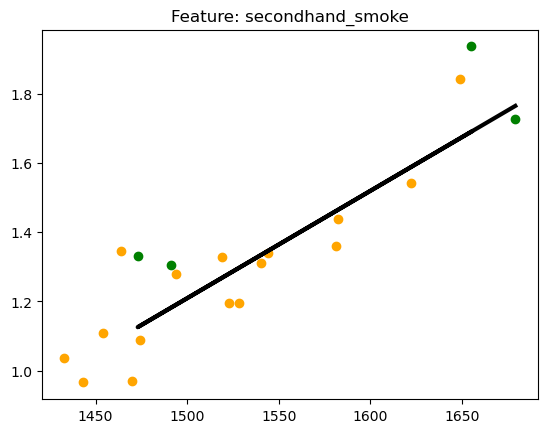

mse: 0.029942785436688275
r2: 0.7853801624118425
coef: [[0.00310313]]




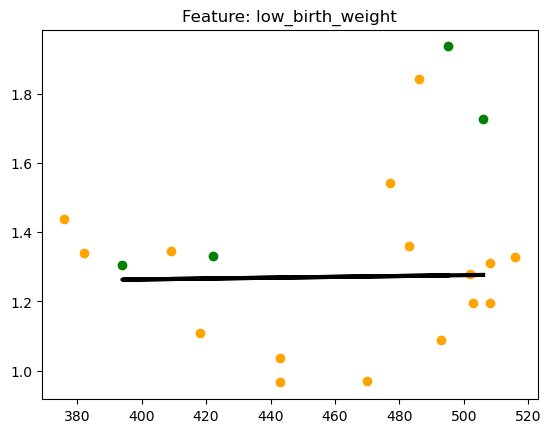

mse: 0.1615712214825447
r2: 0.00062449564187117
coef: [[0.00012189]]




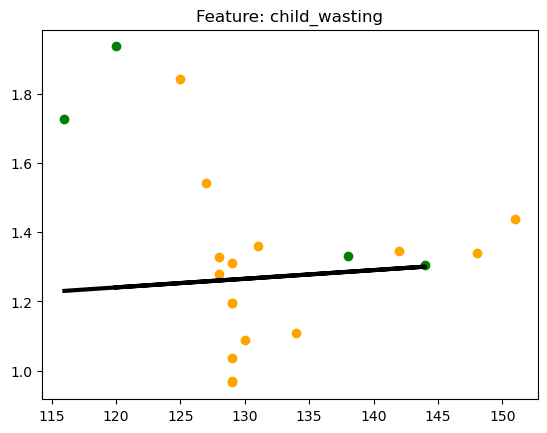

mse: 0.18332727748243874
r2: 0.007274464115039958
coef: [[0.00250028]]




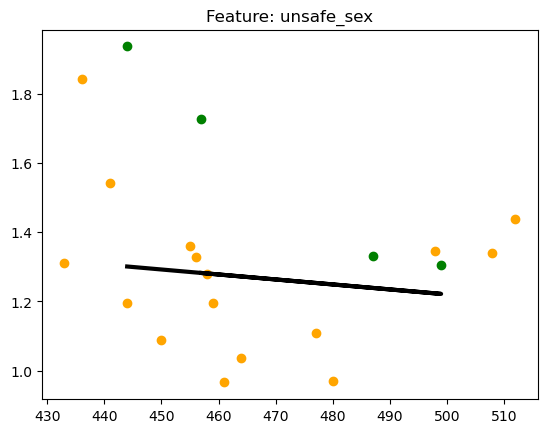

mse: 0.15435413905508366
r2: 0.024265568592741094
coef: [[-0.00143881]]




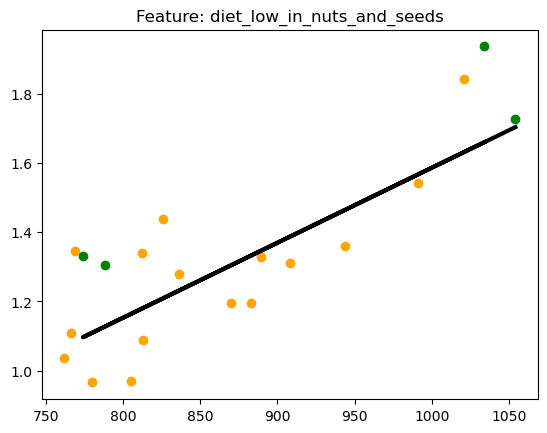

mse: 0.040993341603897865
r2: 0.5928377844001036
coef: [[0.00216731]]




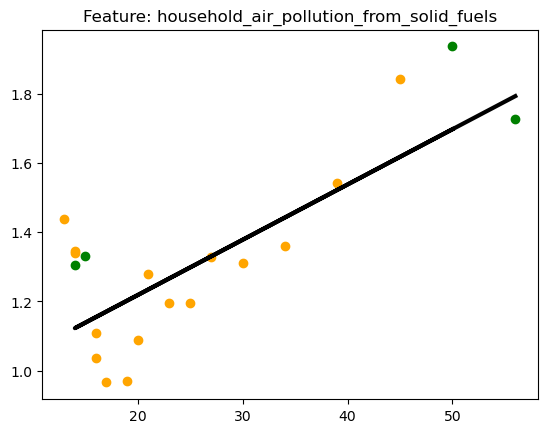

mse: 0.032974314213946115
r2: 0.45386922854252043
coef: [[0.01595873]]




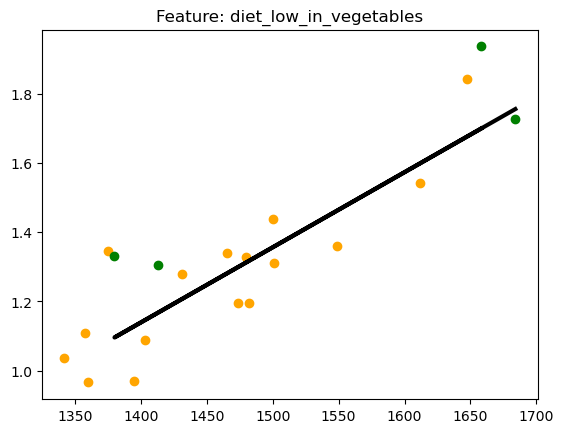

mse: 0.03290420917064797
r2: 0.7456982491974977
coef: [[0.00217029]]




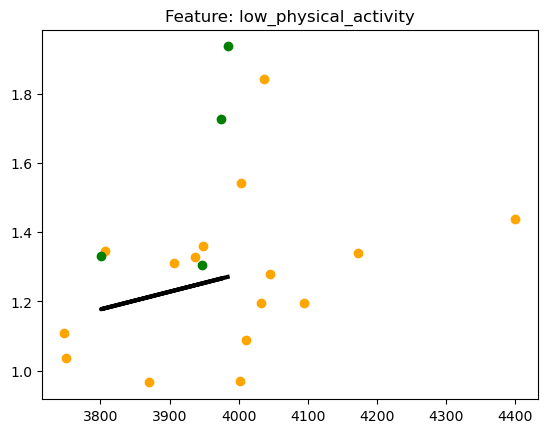

mse: 0.1706699706960142
r2: 0.13536848888961317
coef: [[0.00050967]]




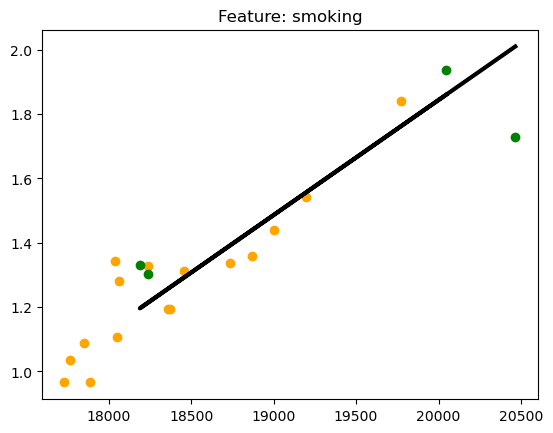

mse: 0.028113094606727652
r2: 0.8457605083518307
coef: [[0.00035709]]




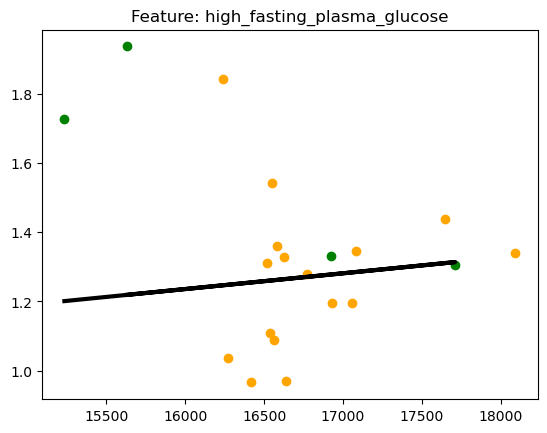

mse: 0.19869349269808498
r2: 0.0099943709436483
coef: [[4.54770191e-05]]




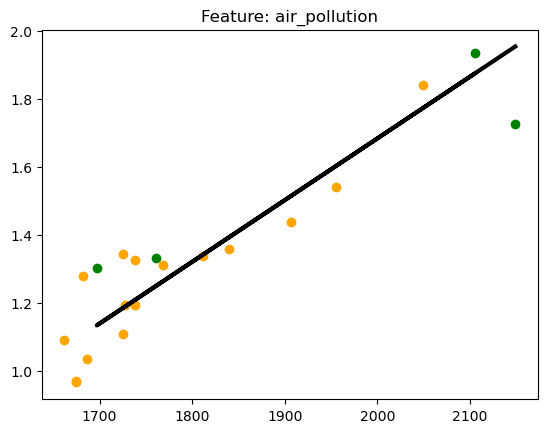

mse: 0.02288946603502975
r2: 0.8272550717686707
coef: [[0.0018173]]




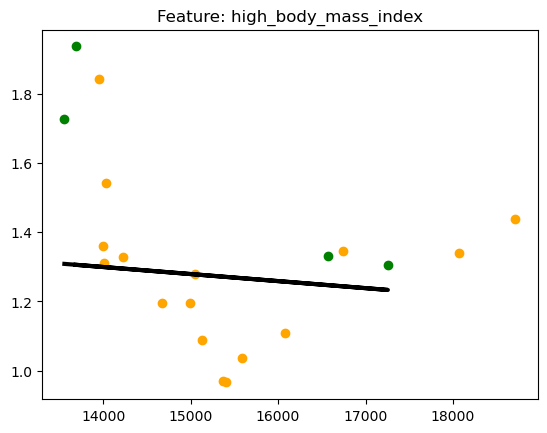

mse: 0.14631325509535698
r2: 0.016656473138194294
coef: [[-2.03661886e-05]]




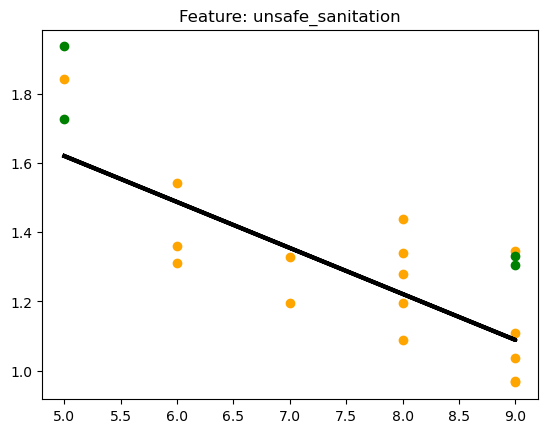

mse: 0.05432244746846347
r2: 0.5979046407684503
coef: [[-0.1327943]]




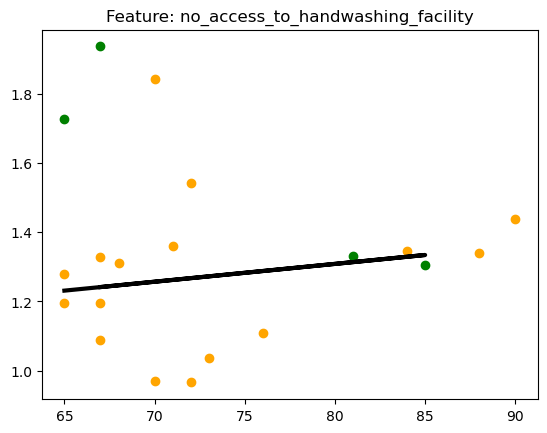

mse: 0.18256224608787677
r2: 0.032424124183142444
coef: [[0.00515003]]




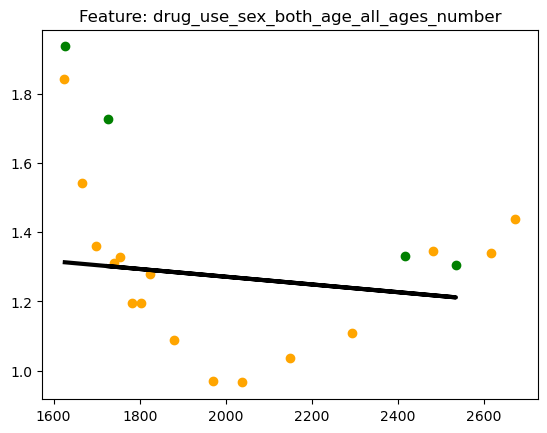

mse: 0.14736754473667668
r2: 0.02910605577759784
coef: [[-0.00011154]]




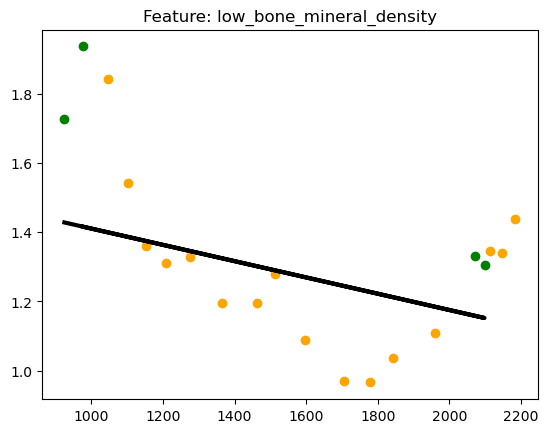

mse: 0.10348881195175785
r2: 0.162182122154664
coef: [[-0.00023529]]




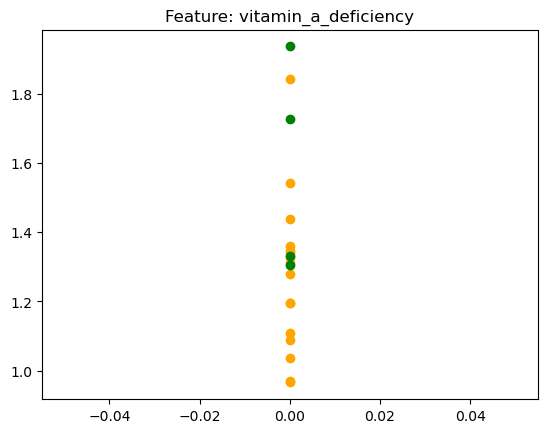

mse: 0.1636959647589423
r2: 0.0
coef: [[0.]]




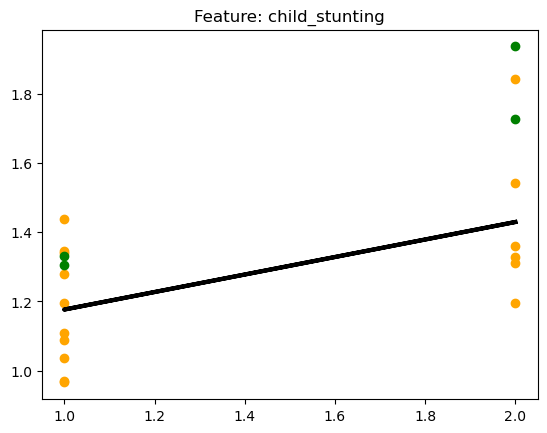

mse: 0.09656124130640034
r2: 0.3156238127694939
coef: [[0.25282576]]




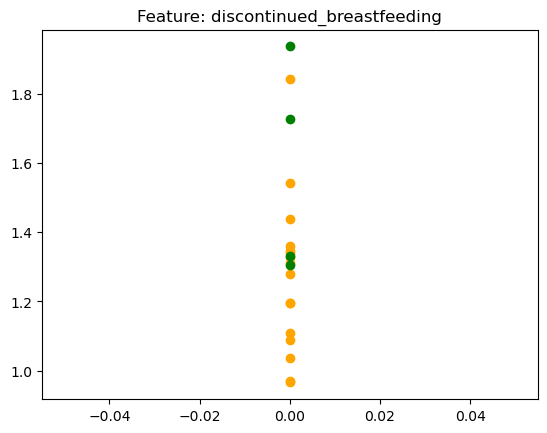

mse: 0.1636959647589423
r2: 0.0
coef: [[0.]]




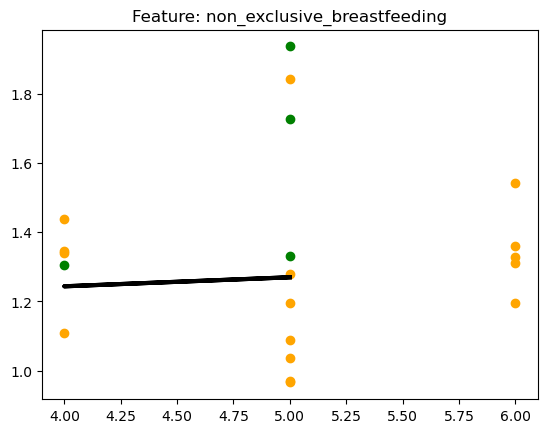

mse: 0.1653126740331395
r2: 0.008026507494530488
coef: [[0.02611604]]




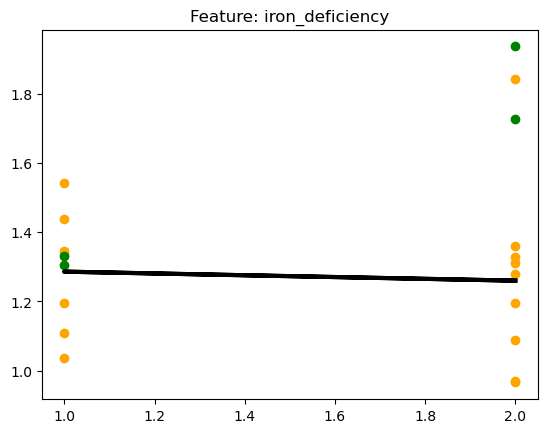

mse: 0.1695587202400301
r2: 0.0035063155492081055
coef: [[-0.02600562]]




In [23]:
# run linear reg for each feature, display plot and stats
features = list(aus.columns)
features.remove('avg_fe_rate')

y_avg_fe = aus.avg_fe_rate

print("AUSTRAILIA DATA")

# from the plots, can see which health feature has the closet correlation
# to the average foreign exchange rate for Austraila 
for i in features:
    f_data = aus[str(i)]
    
    f_data = np.array(f_data).reshape(-1,1)
    y_avg_fe = np.array(y_avg_fe).reshape(-1,1)
    
    f_train, f_test, y_train, y_test = train_test_split(f_data, y_avg_fe, test_size=0.2, random_state=42)
    reg_f = LinearRegression()
    reg_f.fit(f_train, y_train)
    
    pred = reg_f.predict(f_test)
    
    plt.scatter(f_train, y_train, color="orange")
    plt.scatter(f_test, y_test, color="green")
    plt.title("Feature: " + str(i))
    plt.plot(f_test, pred, color="black", linewidth=3)
    plt.show()
    
    mse_f = mean_squared_error(y_test, pred)
    r2_f = reg_f.score(f_train, y_train)
    coef_f = reg_f.coef_
    
    print("mse: " + str(mse_f))
    print("r2: " + str(r2_f))
    print("coef: " + str(coef_f))
    print('\n')
    


## TODO: 
1) repeat process for the rest of the countries
2) maybe add other plots such as a linear graph showing the mse,r2,coef across the years 2000-2019